In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.functions import tpc_lof_name, tpc_counts, midi_on_off, jsd

import os

In [2]:
%%time

# for root, dirs, files in os.walk(".\..\ExtendedTonality\data\midi"):
#     for file in files:
#         if file.endswith(".mid"):
#             path = os.path.join(root, file)
#             midi_on_off(path)

Wall time: 0 ns


In [5]:
JSDs = []

In [26]:
%%time

JSDs = []
filenames = []
errors = []

# # ".\..\ExtendedTonality\data\inferred_tpcs"
for root, dirs, files in os.walk("C:/Users/fabianmoss/Desktop/GitHub/DCMLab/pitchspelling/data/out"):
    for file in files:
        try:
            path = os.path.join(root, file)
            inferred = pd.read_csv(path, sep=r'\s*', header=None, engine='python', names=['type', 'onset', 'offset', 'MIDI', 'TPC'])
            p = tpc_counts(inferred).values
        
            actual = pd.read_csv('./../ExtendedTonality/data/DataFrames/'+file, sep=',', index_col=0)
            q = actual.tpc.value_counts().reindex([tpc_lof_name(i).replace('##', 'x') for i in range(-15,20)]).fillna(0).values

            JSDs.append(jsd(p, q))
        except Exception as e:
            print(e, '\n\t', file)
#         print(jsd(p,q)
# #         filenames.append(file)
# #         except:
# #             errors.append(file)
# #             pass


# #         if file.endswith(".mid"):
# #             path = os.path.join(root, file)
# # #             print(path)
# # #             midi_on_off(path)
# #         elif file.endswith(".xml"):
# #             path = os.path.join(root, file)
# # #             print(path)

File b'./../ExtendedTonality/data/DataFrames/03op44_1a.csv' does not exist 
	 03op44_1a.csv
File b'./../ExtendedTonality/data/DataFrames/03op44_1d.csv' does not exist 
	 03op44_1d.csv
File b'./../ExtendedTonality/data/DataFrames/04op44_2a.csv' does not exist 
	 04op44_2a.csv
File b'./../ExtendedTonality/data/DataFrames/06op80a.csv' does not exist 
	 06op80a.csv
File b'./../ExtendedTonality/data/DataFrames/06op80b.csv' does not exist 
	 06op80b.csv
File b'./../ExtendedTonality/data/DataFrames/06op80c.csv' does not exist 
	 06op80c.csv
File b'./../ExtendedTonality/data/DataFrames/06op80d.csv' does not exist 
	 06op80d.csv
File b'./../ExtendedTonality/data/DataFrames/117606-Nocturne_Opus_27_No._1_in_C_Minor.csv' does not exist 
	 117606-Nocturne_Opus_27_No._1_in_C_Minor.csv
File b'./../ExtendedTonality/data/DataFrames/127045-Nocturne_Opus_9_No._1__in_B_Minor.csv' does not exist 
	 127045-Nocturne_Opus_9_No._1__in_B_Minor.csv
File b'./../ExtendedTonality/data/DataFrames/131461-Nocturne_Opu

File b'./../ExtendedTonality/data/DataFrames/Benedictus.csv' does not exist 
	 Benedictus.csv
File b'./../ExtendedTonality/data/DataFrames/bethena.csv' does not exist 
	 bethena.csv
File b'./../ExtendedTonality/data/DataFrames/Bien-puist_Binchois-Gilles-de-Bins-dit_file1.csv' does not exist 
	 Bien-puist_Binchois-Gilles-de-Bins-dit_file1.csv
File b'./../ExtendedTonality/data/DataFrames/binks.csv' does not exist 
	 binks.csv
File b'./../ExtendedTonality/data/DataFrames/Bon-jour-bon-mois-bon-an-et-bonne-estraine_Du-Fay-Guillaume_file2.csv' does not exist 
	 Bon-jour-bon-mois-bon-an-et-bonne-estraine_Du-Fay-Guillaume_file2.csv
File b'./../ExtendedTonality/data/DataFrames/Brahms_116_1.0_0.0.csv' does not exist 
	 Brahms_116_1.0_0.0.csv
File b'./../ExtendedTonality/data/DataFrames/Brahms_117_1.0_0.0.csv' does not exist 
	 Brahms_117_1.0_0.0.csv
File b'./../ExtendedTonality/data/DataFrames/Brahms_117_2.0_0.0.csv' does not exist 
	 Brahms_117_2.0_0.0.csv
File b'./../ExtendedTonality/data/Data

File b'./../ExtendedTonality/data/DataFrames/eugenia.csv' does not exist 
	 eugenia.csv
File b'./../ExtendedTonality/data/DataFrames/Expectatio-justorum-laetitia_Lassus-Orlande-de_file1.csv' does not exist 
	 Expectatio-justorum-laetitia_Lassus-Orlande-de_file1.csv
File b'./../ExtendedTonality/data/DataFrames/favorite.csv' does not exist 
	 favorite.csv
File b'./../ExtendedTonality/data/DataFrames/felicity.csv' does not exist 
	 felicity.csv
File b'./../ExtendedTonality/data/DataFrames/Felle-amaro-Cruda-Amarilli_Monteverdi-Claudio_file2.csv' does not exist 
	 Felle-amaro-Cruda-Amarilli_Monteverdi-Claudio_file2.csv
File b'./../ExtendedTonality/data/DataFrames/figleaf.csv' does not exist 
	 figleaf.csv
File b'./../ExtendedTonality/data/DataFrames/Fors-seulement-contre_Ockeghem-Jean-de_file3.csv' does not exist 
	 Fors-seulement-contre_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Fulgebunt-justi_Lassus-Orlande-de_file1.csv' does not exist 
	 Fulgebunt-justi_Lass

File b'./../ExtendedTonality/data/DataFrames/Liszt_-_Hungarian_Rhapsody_No._15_Rkczi_March.csv' does not exist 
	 Liszt_-_Hungarian_Rhapsody_No._15_Rkczi_March.csv
File b'./../ExtendedTonality/data/DataFrames/Liszt_-_Tarantella_Annes_de_plerinage_II_Venezia_e_Napoli.csv' does not exist 
	 Liszt_-_Tarantella_Annes_de_plerinage_II_Venezia_e_Napoli.csv
File b'./../ExtendedTonality/data/DataFrames/Liszt_S202_Am_Grabe_R.csv' does not exist 
	 Liszt_S202_Am_Grabe_R.csv
File b'./../ExtendedTonality/data/DataFrames/Ma-bouche-rit_Ockeghem-Jean-de_file2-0.csv' does not exist 
	 Ma-bouche-rit_Ockeghem-Jean-de_file2-0.csv
File b'./../ExtendedTonality/data/DataFrames/Ma-bouche-rit_Ockeghem-Jean-de_file2.csv' does not exist 
	 Ma-bouche-rit_Ockeghem-Jean-de_file2.csv
File b'./../ExtendedTonality/data/DataFrames/Ma-bouche-rit_Ockeghem-Jean-de_file3.csv' does not exist 
	 Ma-bouche-rit_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Ma-maistresse_Ockeghem-Jean-de_file3.csv' doe

File b'./../ExtendedTonality/data/DataFrames/Missa-Ecce-ancilla-Domini_Credo_Ockeghem-Jean-de_file3.csv' does not exist 
	 Missa-Ecce-ancilla-Domini_Credo_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Missa-Ecce-ancilla-Domini_Gloria_Ockeghem-Jean-de_file3.csv' does not exist 
	 Missa-Ecce-ancilla-Domini_Gloria_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Missa-Ecce-ancilla-Domini_Kyrie_Ockeghem-Jean-de_file3.csv' does not exist 
	 Missa-Ecce-ancilla-Domini_Kyrie_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Missa-Ecce-ancilla-Domini_Sanctus_Ockeghem-Jean-de_file3.csv' does not exist 
	 Missa-Ecce-ancilla-Domini_Sanctus_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Missa-Fors-seulement_Credo_Ockeghem-Jean-de_file3.csv' does not exist 
	 Missa-Fors-seulement_Credo_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Missa-Fors-seulement_Gloria_Ockeghem-Jean-de_file

File b'./../ExtendedTonality/data/DataFrames/op01n01d.csv' does not exist 
	 op01n01d.csv
File b'./../ExtendedTonality/data/DataFrames/op01n02a.csv' does not exist 
	 op01n02a.csv
File b'./../ExtendedTonality/data/DataFrames/op01n02b.csv' does not exist 
	 op01n02b.csv
File b'./../ExtendedTonality/data/DataFrames/op01n02c.csv' does not exist 
	 op01n02c.csv
File b'./../ExtendedTonality/data/DataFrames/op01n02d.csv' does not exist 
	 op01n02d.csv
File b'./../ExtendedTonality/data/DataFrames/op01n03a.csv' does not exist 
	 op01n03a.csv
File b'./../ExtendedTonality/data/DataFrames/op01n03b.csv' does not exist 
	 op01n03b.csv
File b'./../ExtendedTonality/data/DataFrames/op01n03c.csv' does not exist 
	 op01n03c.csv
File b'./../ExtendedTonality/data/DataFrames/op01n04a.csv' does not exist 
	 op01n04a.csv
File b'./../ExtendedTonality/data/DataFrames/op01n04b.csv' does not exist 
	 op01n04b.csv
File b'./../ExtendedTonality/data/DataFrames/op01n04c.csv' does not exist 
	 op01n04c.csv
File b'./.

File b'./../ExtendedTonality/data/DataFrames/op4n1-01.csv' does not exist 
	 op4n1-01.csv
File b'./../ExtendedTonality/data/DataFrames/op4n1-03.csv' does not exist 
	 op4n1-03.csv
File b'./../ExtendedTonality/data/DataFrames/op4n10-02.csv' does not exist 
	 op4n10-02.csv
File b'./../ExtendedTonality/data/DataFrames/op4n10-03.csv' does not exist 
	 op4n10-03.csv
File b'./../ExtendedTonality/data/DataFrames/op4n11-01.csv' does not exist 
	 op4n11-01.csv
File b'./../ExtendedTonality/data/DataFrames/op4n11-02.csv' does not exist 
	 op4n11-02.csv
File b'./../ExtendedTonality/data/DataFrames/op4n11-03.csv' does not exist 
	 op4n11-03.csv
File b'./../ExtendedTonality/data/DataFrames/op4n12-01.csv' does not exist 
	 op4n12-01.csv
File b'./../ExtendedTonality/data/DataFrames/op4n12-02.csv' does not exist 
	 op4n12-02.csv
File b'./../ExtendedTonality/data/DataFrames/op4n12-03.csv' does not exist 
	 op4n12-03.csv
File b'./../ExtendedTonality/data/DataFrames/op4n2-01.csv' does not exist 
	 op4n2-0

File b'./../ExtendedTonality/data/DataFrames/op6n11-05.csv' does not exist 
	 op6n11-05.csv
File b'./../ExtendedTonality/data/DataFrames/op6n11-06.csv' does not exist 
	 op6n11-06.csv
File b'./../ExtendedTonality/data/DataFrames/op6n12-01.csv' does not exist 
	 op6n12-01.csv
File b'./../ExtendedTonality/data/DataFrames/op6n12-02.csv' does not exist 
	 op6n12-02.csv
File b'./../ExtendedTonality/data/DataFrames/op6n12-03.csv' does not exist 
	 op6n12-03.csv
File b'./../ExtendedTonality/data/DataFrames/op6n12-04.csv' does not exist 
	 op6n12-04.csv
File b'./../ExtendedTonality/data/DataFrames/op6n12-05.csv' does not exist 
	 op6n12-05.csv
File b'./../ExtendedTonality/data/DataFrames/op6n2-02.csv' does not exist 
	 op6n2-02.csv
File b'./../ExtendedTonality/data/DataFrames/op6n2-03.csv' does not exist 
	 op6n2-03.csv
File b'./../ExtendedTonality/data/DataFrames/op6n2-04.csv' does not exist 
	 op6n2-04.csv
File b'./../ExtendedTonality/data/DataFrames/op6n3-01.csv' does not exist 
	 op6n3-01.

	 Prelude-in-F-Minor-Op.-67-no.-18-Con-molto-fuoco_Hummel-Johann-Nepomuk_file1.csv
File b'./../ExtendedTonality/data/DataFrames/Prelude-in-F-sharp-Major-Op.-67-no.-13-Allegro-con-fuoco_Hummel-Johann-Nepomuk_file3.csv' does not exist 
	 Prelude-in-F-sharp-Major-Op.-67-no.-13-Allegro-con-fuoco_Hummel-Johann-Nepomuk_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Prelude-in-F-sharp-Minor-Op.-67-no.-8-Allegro-molto-animato_Hummel-Johann-Nepomuk_file4.csv' does not exist 
	 Prelude-in-F-sharp-Minor-Op.-67-no.-8-Allegro-molto-animato_Hummel-Johann-Nepomuk_file4.csv
File b'./../ExtendedTonality/data/DataFrames/Prelude-in-G-Major-Op.-67-No.-3-Allegro_Hummel-Johann-Nepomuk_file4.csv' does not exist 
	 Prelude-in-G-Major-Op.-67-No.-3-Allegro_Hummel-Johann-Nepomuk_file4.csv
File b'./../ExtendedTonality/data/DataFrames/Prelude-in-G-Minor-Op.-67-no.-22-Allegro-vivace_Hummel-Johann-Nepomuk_file4.csv' does not exist 
	 Prelude-in-G-Minor-Op.-67-no.-22-Allegro-vivace_Hummel-Johann-Nepomuk_file4

File b'./../ExtendedTonality/data/DataFrames/sonata03-3.csv' does not exist 
	 sonata03-3.csv
File b'./../ExtendedTonality/data/DataFrames/sonata04-1.csv' does not exist 
	 sonata04-1.csv
File b'./../ExtendedTonality/data/DataFrames/sonata04-2.csv' does not exist 
	 sonata04-2.csv
File b'./../ExtendedTonality/data/DataFrames/sonata04-3.csv' does not exist 
	 sonata04-3.csv
File b'./../ExtendedTonality/data/DataFrames/sonata05-1.csv' does not exist 
	 sonata05-1.csv
File b'./../ExtendedTonality/data/DataFrames/sonata05-2.csv' does not exist 
	 sonata05-2.csv
File b'./../ExtendedTonality/data/DataFrames/sonata05-3.csv' does not exist 
	 sonata05-3.csv
File b'./../ExtendedTonality/data/DataFrames/sonata06-1.csv' does not exist 
	 sonata06-1.csv
File b'./../ExtendedTonality/data/DataFrames/sonata06-2.csv' does not exist 
	 sonata06-2.csv
File b'./../ExtendedTonality/data/DataFrames/sonata06-3a.csv' does not exist 
	 sonata06-3a.csv
File b'./../ExtendedTonality/data/DataFrames/sonata06-3b.c

File b'./../ExtendedTonality/data/DataFrames/swipesy.csv' does not exist 
	 swipesy.csv
File b'./../ExtendedTonality/data/DataFrames/Tant-fuz-gentement-resjouy_Ockeghem-Jean-de_file3.csv' does not exist 
	 Tant-fuz-gentement-resjouy_Ockeghem-Jean-de_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Te-Jesu-Christe-Ecco-piegando_Monteverdi-Claudio_file3.csv' does not exist 
	 Te-Jesu-Christe-Ecco-piegando_Monteverdi-Claudio_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Trio-Sonata-in-A-Minor-op.-1-no.-3_Adagio_Buxtehude-Dietrich_file3.csv' does not exist 
	 Trio-Sonata-in-A-Minor-op.-1-no.-3_Adagio_Buxtehude-Dietrich_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Trio-Sonata-in-A-Minor-op.-1-no.-3_Allegro_Buxtehude-Dietrich_file3.csv' does not exist 
	 Trio-Sonata-in-A-Minor-op.-1-no.-3_Allegro_Buxtehude-Dietrich_file3.csv
File b'./../ExtendedTonality/data/DataFrames/Trio-Sonata-in-A-Minor-op.-1-no.-3_Largo_Buxtehude-Dietrich_file3.csv' does not exist 
	 Trio-Sonat

In [27]:
len(JSDs)

0

In [ ]:
len(JSDs) == len(filenames)

In [ ]:
len(errors)

In [ ]:
# errors

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(22,10))

ax.scatter(np.arange(len(JSDs)), JSDs);
for x,y,s in zip(np.arange(len(JSDs)), JSDs, filenames):
    if y < np.inf:
        ax.text(x,y,s, ha='center', va='center', fontsize=6)
    
plt.show()

In [112]:
# [f for i, f in enumerate(filenames) if JSDs[i]>.5]

In [29]:
meta = pd.read_csv('../ExtendedTonality/metadata.csv', sep='\t')

In [30]:
meta = meta[meta.parsed==1].sort_values(by='display_year')

In [31]:
meta.shape

(1980, 26)

In [83]:
JSDs = []
years = []
errors = []

for i, row in meta.iterrows():
    try:
        f = row.filename
        
#             '../ExtendedTonality/data/inferred_tpcs/'
        if f+'.csv' in os.listdir("C:/Users/fabianmoss/Desktop/GitHub/DCMLab/pitchspelling/data/out"):
        
            y = row.display_year
            years.append(y)
            
            original = pd.read_csv(
                '../ExtendedTonality/data/DataFrames/'+f+'.csv', 
                sep=',', 
                encoding='utf-8', 
                engine='python'
            ).tpc.value_counts().reindex([tpc_lof_name(i).replace('##', 'x') for i in range(-15,20)]).fillna(0)
            p = original.values
            
            inferred = pd.read_csv(
#                 '../ExtendedTonality/data/inferred_tpcs/'+f+'.csv', 
                "C:/Users/fabianmoss/Desktop/GitHub/DCMLab/pitchspelling/data/out/"+f+".csv",
                sep=r'\s+',
                encoding='utf-8', 
                engine='python', 
                header=None, 
                names=['type', 'onset', 'offset', 'MIDI', 'TPC']
            )
            
            q = tpc_counts(inferred).values
            
            JSDs.append(jsd(p,q))
            
    except Exception as e:
        errors.append(f)
        print(e, f)
        pass

In [84]:
len(JSDs)

1041

In [85]:
len(errors)

0

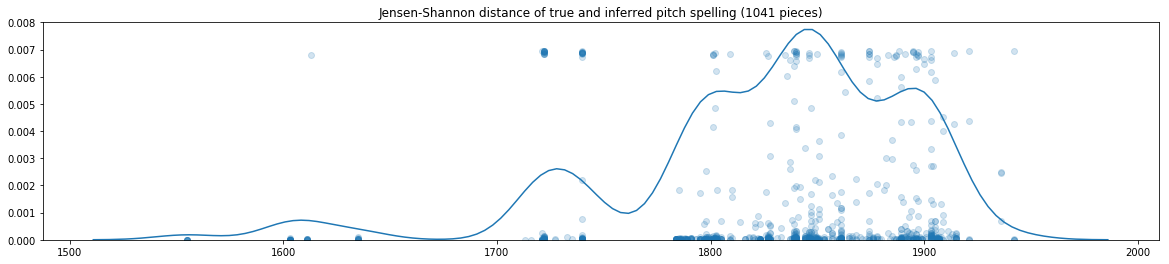

In [89]:
fig, ax = plt.subplots(figsize=(20,4))
ax.scatter(years,[j/100 for j in JSDs], alpha=0.2)
sns.distplot(years,ax=ax, rug=False, hist=False, kde=True)
ax.set_ylim(0,.008)
plt.title(f'Jensen-Shannon distance of true and inferred pitch spelling ({len(JSDs)} pieces)');

In [104]:
pcws = [f'pcw{i}' for i in range(12)]

midi_meta = pd.read_csv("./../ExtendedTonality/data/mdata_updated.csv", index_col=0)
midi_meta[pcws]

,pcw0,pcw1,pcw2,pcw3,pcw4,pcw5,pcw6,pcw7,pcw8,pcw9,pcw10,pcw11
0,22236.0,3136.0,16960.0,5576.0,22364.0,22208.0,4104.0,16212.0,8512.0,22620.0,2112.0,12736.0
1,28672.0,34184.0,0.0,5888.0,11328.0,45648.0,1792.0,704.0,512.0,9216.0,36360.0,0.0
2,2512.0,2608.0,1776.0,1728.0,20800.0,2016.0,1424.0,18560.0,6688.0,10560.0,7264.0,18144.0
3,17836.0,45024.0,191768.0,2608.0,50916.0,130204.0,25796.0,63452.0,1908.0,166136.0,35912.0,25396.0
4,88424.0,48512.0,0.0,30704.0,11264.0,86016.0,0.0,40944.0,71856.0,0.0,54448.0,0.0
5,5280.0,17088.0,7552.0,11552.0,11392.0,7872.0,9920.0,5824.0,13600.0,11008.0,17792.0,11808.0
6,29776.0,448.0,19168.0,928.0,16616.0,23424.0,1312.0,20808.0,576.0,20000.0,352.0,16896.0
7,256.0,256.0,3584.0,21632.0,6912.0,8256.0,33472.0,256.0,256.0,256.0,256.0,18624.0
8,57536.0,32.0,25132.0,32.0,51652.0,22480.0,6848.0,52592.0,8384.0,45276.0,1344.0,18624.0
9,1474.0,750.0,2653.0,1547.0,8863.0,609.0,5640.0,2625.0,0.0,1939.0,1402.0,16064.0


**Read Chopin piece from Temperley's KP Corpus**

In [2]:
df = pd.read_csv('data/changed.csv', sep='\s*', header=None, names=['type', 'onset', 'offset', 'MIDI', 'TPC'])
# df = pd.read_csv('outfiles/chop.maz63-2.csv', sep='\s*', header=None, names=['type', 'onset', 'offset', 'MIDI', 'TPC'])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,type,onset,offset,MIDI,TPC
0,TPCNote,0,490,37,-3
1,TPCNote,490,1260,41,1
2,TPCNote,1260,1505,45,5
3,TPCNote,1505,2485,45,5
4,TPCNote,2485,3010,46,0


In [5]:
tpc_counts(df)

Fbb     0.0
Cbb     0.0
Gbb     0.0
Dbb     0.0
Abb     0.0
Ebb     1.0
Bbb    12.0
Fb     20.0
Cb     23.0
Gb     15.0
Db     52.0
Ab     28.0
Eb     17.0
Bb     16.0
F      15.0
C       0.0
G       0.0
D       2.0
A       3.0
E       0.0
B       0.0
F#      0.0
C#      0.0
G#      0.0
D#      0.0
A#      0.0
E#      0.0
B#      0.0
Fx      0.0
Cx      0.0
Gx      0.0
Dx      0.0
Ax      0.0
Ex      0.0
Bx      0.0
Name: tpc_name, dtype: float64

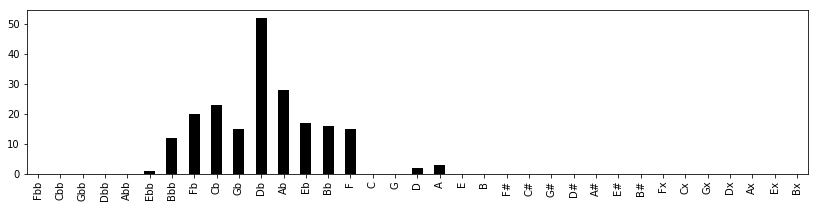

In [8]:
tpc_counts(df).plot.bar(color='k', figsize=(14,3));

In [9]:
jsd(tpc_counts(df).values, tpc_counts(df).values + 10)

NameError: name 'np' is not defined

In [10]:
def df2midi(df, path=None, track=0, channel=0, tempo=50_000, volume=100):
    
    degrees   = df.MIDI.values  # MIDI note number
    onsets    = df.onset.values  # In beats
    durations = (df.offset - df.onset).values  # In beats
    
    track     = track
    channel   = channel
    tempo     = tempo   # In BPM
    volume    = volume  # 0-127, as per the MIDI standard

    MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                          # automatically)
    MyMIDI.addTempo(track, time, tempo)

    for i, (pitch, onset, duration) in enumerate(zip(degrees, onsets, durations)):
        MyMIDI.addNote(track, channel, pitch, onset, duration, volume)
    
    if path is not None:
        with open(path, "wb") as output_file:
            MyMIDI.writeFile(output_file)

In [17]:
df2midi(df, path='testfile.mid')

NameError: name 'time' is not defined

**Import MIDI data**

In [ ]:
path = '../../GitHub/DCMLab/HistoryOfModes/pitch_class_distributions.csv'

In [12]:
midi = pd.read_csv(path)

NameError: name 'path' is not defined

In [ ]:
midi.shape

There are 12,625 pieces with year information

In [13]:
midi_by_year = midi.groupby('year').mean().iloc[:,1:]

NameError: name 'midi' is not defined

In [14]:
midi_by_year.shape

NameError: name 'midi_by_year' is not defined

In [15]:
midi_by_year.index.min()

NameError: name 'midi_by_year' is not defined

In [16]:
idx = np.arange(midi_by_year.index.min(), midi_by_year.index.max())
midi_all_years = pd.DataFrame(0, index=idx, columns=["pc"+str(i) for i in range(12)])

NameError: name 'midi_by_year' is not defined

In [269]:
for i, row in midi_all_years.iterrows():
    if i in midi_by_year.index:
        midi_all_years.loc[i,:] = midi_by_year.loc[i,:]
    else:
        midi_all_years.loc[int(i),:] = midi_all_years.loc[int(i)-1,:]

In [270]:
midi_all_years.shape

(775, 12)

but only compositions in 347 distinct years

In [271]:
midi_all_years.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
1199.0,0.129996,0.000000,0.138726,0.000000,0.277669,0.00579,0.031026,0.082177,0.000000,0.297904,0.000000,0.036711
1200.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1201.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1202.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1203.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795


In [273]:
years = midi_all_years.index
pcs = midi_all_years#.iloc[:,3:]
pcs.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
1199.0,0.129996,0.000000,0.138726,0.000000,0.277669,0.00579,0.031026,0.082177,0.000000,0.297904,0.000000,0.036711
1200.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1201.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1202.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1203.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795


Reorder pcs in circle of fifths

In [274]:
shift = 6

pcs.columns = [str(j) for j in range(12)]
pcs = pcs[[str((j*7 + shift) % 12) for j in range(12)]] # sort in fifths and shift so that C=0 is in center

In [275]:
pcs.head()

,6,1,8,3,10,5,0,7,2,9,4,11
1199.0,0.031026,0.000000,0.000000,0.000000,0.000000,0.00579,0.129996,0.082177,0.138726,0.297904,0.277669,0.036711
1200.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795
1201.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795
1202.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795
1203.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795


Plot NPC evolution

In [280]:
ws = 50
win_type= 'cosine'
center=False

x = midi_all_years.index
y = midi_all_years.fillna(0).T.rolling(ws, axis=1, win_type=win_type, center=center).mean().values

In [281]:
H = midi_all_years.fillna(0).apply(entropy, axis=1) / np.log2(12)
H = H.rolling(ws, win_type=win_type, center=center).mean().values

In [282]:
colors = sns.color_palette('twilight_shifted',12)

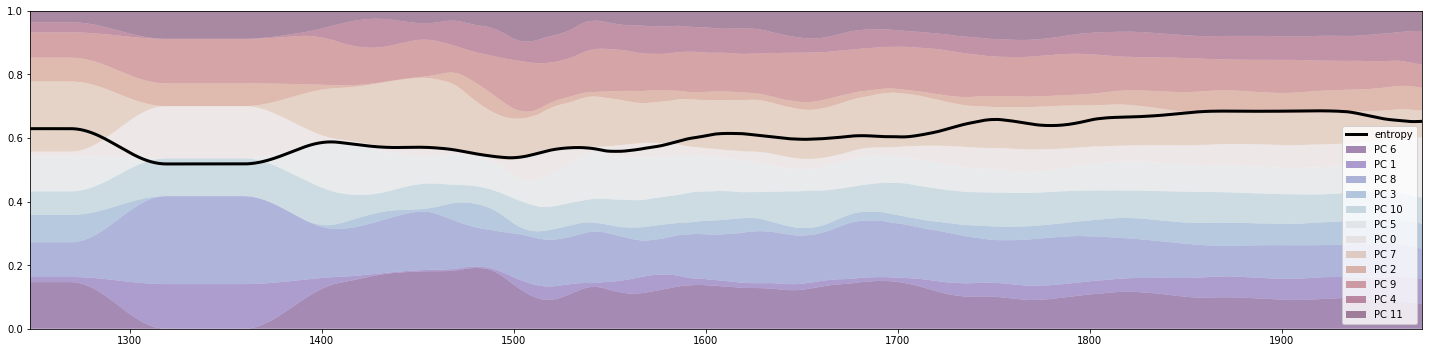

In [283]:
fig, ax = plt.subplots(figsize=(20,5))

ax.stackplot(x,y, colors=colors, labels=["PC " + str(l) for l in pcs.columns], alpha=0.5)
ax.plot(x,H, lw=3, color='k', label='entropy')
plt.legend()
plt.tight_layout()
plt.margins(0,0)
plt.show();

**Todo:**
1. Bootstrap subsamples and calculate entropy
1. Convert my corpus to NPC and compare with this corpus
1. Evaluate Temperley's pitch-spelling algorithm on my corpus assuming all spelling is correct
1. Apply Temperley's pitch-spelling algorithm and compare the two corpora

In [284]:
ent.shape, H.shape

((327,), (775,))

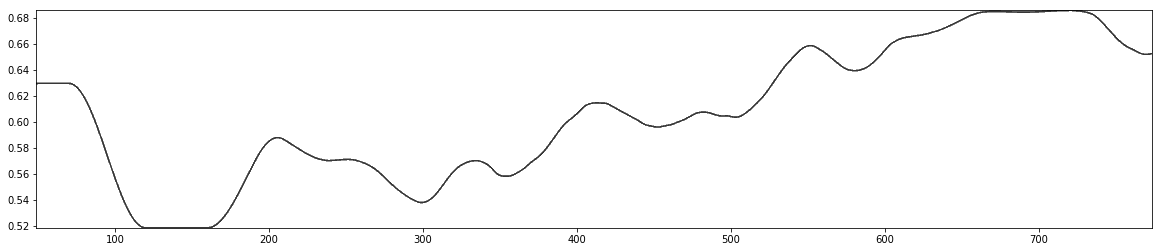

In [294]:
fig, ax = plt.subplots(figsize=(20,4))

for i in range(100):
    sampled = midi.sample(n=midi.shape[0], replace=True, axis=0)
    
    idx = np.arange(midi_by_year.index.min(), midi_by_year.index.max())
    midi_all_years = pd.DataFrame(0, index=idx, columns=["pc"+str(i) for i in range(12)])
    
    for i, row in midi_all_years.iterrows():
        if i in midi_by_year.index:
            midi_all_years.loc[i,:] = midi_by_year.loc[i,:]
        else:
            midi_all_years.loc[int(i),:] = midi_all_years.loc[int(i)-1,:]
    
    ent = midi_all_years.fillna(0).apply(entropy, axis=1) / np.log2(12)
    ent = ent.rolling(ws, win_type=win_type, center=center).mean().values
    ax.plot(ent, color='k', alpha=.01)
# ax.plot(H, color='r')
# plt.ylim(0,1)
plt.margins(0,0)

In [22]:
liszt = pd.read_csv('../../GitHub/DCMLab/ExtendedTonality/data/DataFrames/Liszt_S202_Am_Grabe_R.xml.csv', index_col=0)
liszt.columns

Index(['filepath', 'composer', 'filename', 'measure_no', 'no_accs', 'mode',
       'key_area', 'type', 'note_name', 'tpc', 'step', 'acc', 'octave',
       'pitch', 'pitch_class', 'duration', 'onset'],
      dtype='object')

In [26]:
liszt[['measure_no', 'onset', 'tpc', 'pitch_class']]

,measure_no,onset,tpc,pitch_class
0,1,0.0,NaN,NaN
1,2,2.0,NaN,NaN
2,3,4.0,NaN,NaN
3,4,6.0,NaN,NaN
4,5,8.0,NaN,NaN
5,6,10.0,NaN,NaN
6,7,12.0,NaN,NaN
7,7,13.0,D,2.0
8,8,14.0,D,2.0
9,8,15.0,D#,3.0
